# Characterizing Clients' Usage of Ford GoBike System
## by Amen T. AJAMU

## Investigation Overview


I will be considering days of the week when clients used this service most and the effect user type has on the routes toured and the duration of use of the system



## Dataset Overview

The dataset contains 174,952 non-null entries of individual bike rides made on Ford GoBike's bike-sharing platfrom in the  greater San Francisco Bay area in february 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
#dropping null values
df.dropna(inplace=True)

#changing the unit of measuring the duration from seconds to minutes by creating a new column
df['duration'] = df['duration_sec'].apply(lambda x: x/60)

#dropping the old column
df.drop('duration_sec', axis =1, inplace = True)

In [4]:
#creating a new feature called "age" by subtracting all the birth years from 2019
df['age'] = df['member_birth_year'].apply(lambda x: 2019- x)

#dropping the old column
df.drop('member_birth_year', axis =1, inplace = True)

In [5]:
#creating a separate column for the day of week inwhich the bike was booked

df['start_day']= pd.to_datetime(df['start_time']).dt.dayofweek

In [6]:
#decoding the days of the week in which the bikes were booked

df['start_day'] = df['start_day'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday',
                                          6:'Saturday'})

## Distribution of the Duration use of Ford GoBike system

The distribution is plotted on a logarithmic scale and was found to be normally distributed around the mean of 11minutes

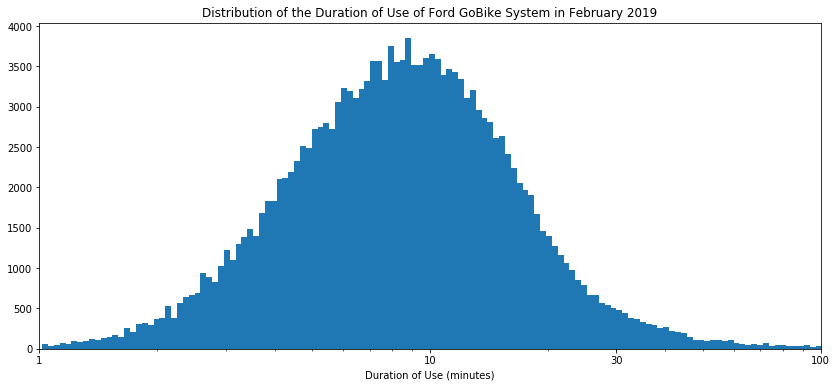

In [13]:
#putting this variable on a log  scale, then setting boundaries to strip off the long tail to the right.
log_binsize = 0.015
bins = 10 ** np.arange(0.007, np.log10(df['duration'].max())+log_binsize, log_binsize)
ticks = [1, 10, 30, 100, 1400]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[14, 6])
plt.hist(data = df, x = 'duration', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Duration of Use (minutes)')
plt.title('Distribution of the Duration of Use of Ford GoBike System in February 2019')
plt.xlim((1,100))
plt.show();

## A Distribution of the Two User-types

A doughnut plot showing the distribution of the usertype. It is obvious that subcribers make up the largest proportion of the users of the Ford GoBike system in february 2019

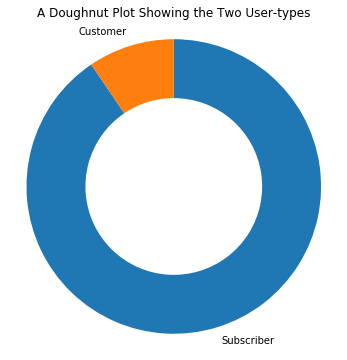

In [12]:
#making a plot of the user type

sorted_count = df.user_type.value_counts()
#set plot dimensions
plt.figure(figsize = [14,6])
plt.pie(sorted_count, labels =sorted_count.index, startangle = 90, counterclock = False, wedgeprops = {"width":0.4})
plt.title('A Doughnut Plot Showing the Two User-types')
plt.axis('square');

## Number of Ford GoBike System by Day of Week

The Visualization clearly shows that the Ford GoBike system was least used on weekends barring Sunday, but used the most on the first three days of the week

In [9]:
day_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#changing start_day to an ordered categorical variable
df['start_day'] = pd.Categorical(df['start_day'], ordered = True, categories=day_order)

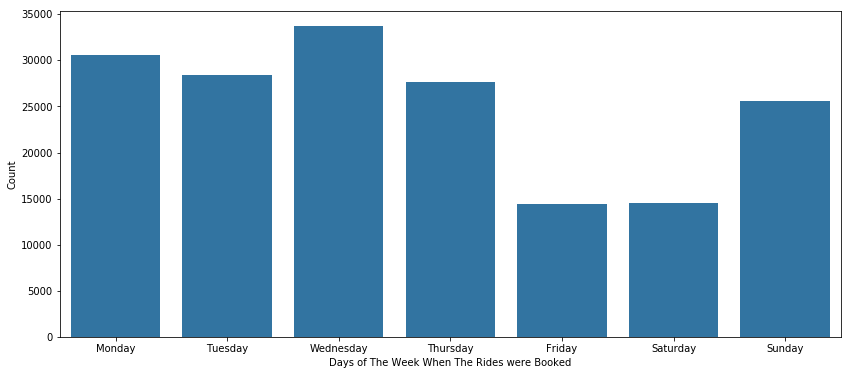

In [10]:
#distribution of the days of the week inwhich the rides were booked

base_color = sb.color_palette()[0]
#set plot dimensions
plt.figure(figsize = [14,6])

sb.countplot(data=df, x='start_day', color = base_color)
plt.xlabel('Days of The Week When The Rides were Booked')
plt.ylabel('Count');

## The Effect User-type Has on The Relationship Between User Take-off Point and User Destination

Here, we can see that there is some kind of predictability of a user's destination based on their take-off point. Also, non-subcribers have a less arbitrary use of the system than subscibers i.e, non-subcribers have more definite, almost constant routes on-which they use Ford GoBike's system.

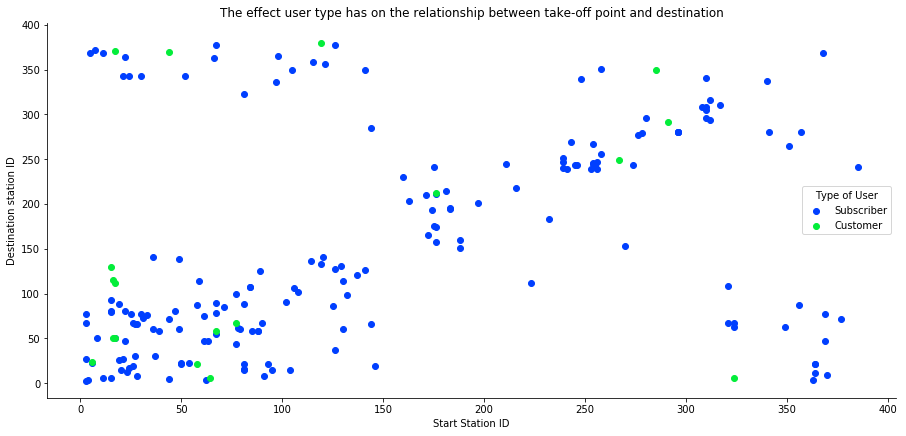

In [17]:
#checking what effect user type has on the relationship between start and end points
df_samp = df.sample(n=200, replace = False)
g = sb.FacetGrid(data = df_samp, hue = 'user_type', size = 6, palette = 'bright')
g.map(plt.scatter, 'start_station_id', 'end_station_id')
g.set_xlabels('Start Station ID')
g.set_ylabels('Destination station ID')
#set plot dimensions
plt.title("The effect user type has on the relationship between take-off point and destination")
plt.legend(['Subscriber','Customer'], title = 'Type of User')
g.fig.set_size_inches(14,6);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 368720 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/